# Exercise 1

## Finance Account Receivable

Load the dataset from 

https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/Finance-Accounts-Receivable.csv

Understand the factors of successful collection efforts. You can Predict which customers will pay fastest and recover more money and improve collections efficiency.

Perform - 
- Cleaing of data (If required)
- Exploratory Analysis - This is not feature selection or feature engineering, Here you need to perform Data Analytics, Use Visualization, Statistics and Filtering to Comment on the pattern present in the data.
- Perform Clustering usign KMeans on group of any 3 features, you find important in the previous analysis.
- Perform Feature Engineering using suitable techniques. Comment your results and findings
- Use appropriate algorithms to build a predictive model.
- Compare the training time, validation accuracy and prediction time for atleast 3 algorithms using cross validation.
- Build a pipeline for all the preprocessing steps.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/Finance-Accounts-Receivable.csv')
df.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0
1,406,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6
2,391,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0
3,406,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5
4,818,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countryCode    2466 non-null   int64  
 1   customerID     2466 non-null   object 
 2   PaperlessDate  2466 non-null   object 
 3   invoiceNumber  2466 non-null   int64  
 4   InvoiceDate    2466 non-null   object 
 5   DueDate        2466 non-null   object 
 6   InvoiceAmount  2466 non-null   float64
 7   Disputed       2466 non-null   object 
 8   SettledDate    2466 non-null   object 
 9   PaperlessBill  2466 non-null   object 
 10  DaysToSettle   2466 non-null   int64  
 11  DaysLate       2466 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 231.3+ KB


In [4]:
df.isnull().sum()

countryCode      0
customerID       0
PaperlessDate    0
invoiceNumber    0
InvoiceDate      0
DueDate          0
InvoiceAmount    0
Disputed         0
SettledDate      0
PaperlessBill    0
DaysToSettle     0
DaysLate         0
dtype: int64

In [5]:
df.describe()

,countryCode,invoiceNumber,InvoiceAmount,DaysToSettle,DaysLate
count,2466.000000,2.466000e+03,2466.000000,2466.00000,2466.000000
mean,620.446067,4.978431e+09,59.895856,26.44485,3.442417
std,215.933610,2.884272e+09,20.435838,12.33493,6.290607
min,391.000000,6.113650e+05,5.260000,0.00000,0.000000
25%,406.000000,2.528854e+09,46.400000,18.00000,0.000000
50%,770.000000,4.964228e+09,60.560000,26.00000,0.000000
75%,818.000000,7.494512e+09,73.765000,35.00000,5.000000
max,897.000000,9.990244e+09,128.280000,75.00000,45.000000


In [6]:
df.columns

Index(['countryCode', 'customerID', 'PaperlessDate', 'invoiceNumber',
       'InvoiceDate', 'DueDate', 'InvoiceAmount', 'Disputed', 'SettledDate',
       'PaperlessBill', 'DaysToSettle', 'DaysLate'],
      dtype='object')

In [7]:
df.drop(['customerID','PaperlessDate','invoiceNumber','InvoiceDate','DueDate','SettledDate'],axis=1,inplace=True)
df.head()

,countryCode,InvoiceAmount,Disputed,PaperlessBill,DaysToSettle,DaysLate
0,391,55.94,No,Paper,13,0
1,406,61.74,Yes,Electronic,36,6
2,391,65.88,No,Electronic,5,0
3,406,105.92,No,Electronic,35,5
4,818,72.27,Yes,Paper,34,4


In [8]:
df['PaperlessBill'].unique()

array(['Paper', 'Electronic'], dtype=object)

In [9]:
df['PaperlessBill'].replace(['Paper','Electronic'],[0,1],inplace=True)
df.head()

,countryCode,InvoiceAmount,Disputed,PaperlessBill,DaysToSettle,DaysLate
0,391,55.94,No,0,13,0
1,406,61.74,Yes,1,36,6
2,391,65.88,No,1,5,0
3,406,105.92,No,1,35,5
4,818,72.27,Yes,0,34,4


In [10]:
from sklearn.preprocessing import LabelEncoder
df.Disputed = LabelEncoder().fit_transform(df.Disputed)
df.head()

,countryCode,InvoiceAmount,Disputed,PaperlessBill,DaysToSettle,DaysLate
0,391,55.94,0,0,13,0
1,406,61.74,1,1,36,6
2,391,65.88,0,1,5,0
3,406,105.92,0,1,35,5
4,818,72.27,1,0,34,4


In [46]:
num = ['countryCode','InvoiceAmount','DaysToSettle','DaysLate']
cat = ['PaperlessBill']

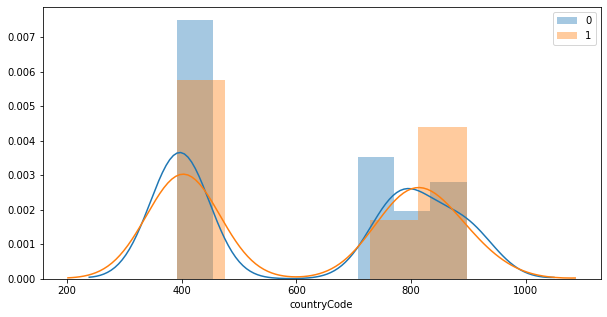

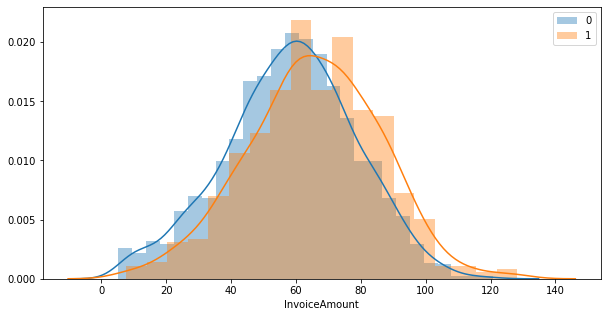

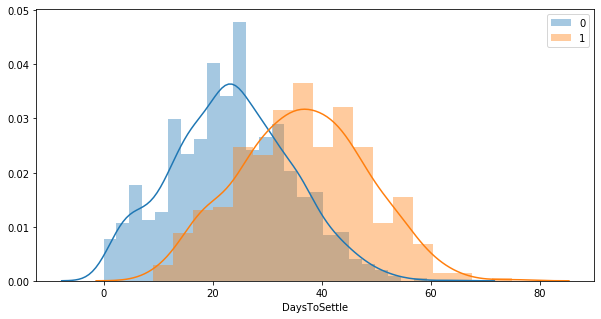

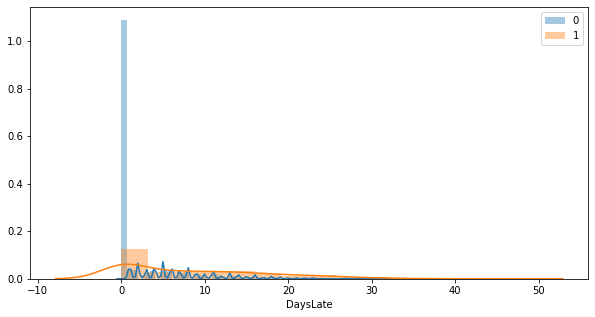

In [12]:
for col in num:
    plt.figure(figsize=(10,5))
    sns.distplot(df[col][df.Disputed==0])
    sns.distplot(df[col][df.Disputed==1])
    plt.legend(['0','1'])
    plt.show()

InvoiceAmount, DaysToSettle, DaysLate are important

- InvoiceAmount doesn't significantly
- DaysToSettle more than 30 seem to be dispute
- Customer who have 0 dayslate have high probability of not dispute

In [33]:
df.countryCode.unique()

array([391, 406, 818, 897, 770], dtype=int64)

In [50]:
df2 = df[['InvoiceAmount','PaperlessBill','DaysLate']]
df2.head()

,InvoiceAmount,PaperlessBill,DaysLate
0,55.94,0,0
1,61.74,1,6
2,65.88,1,0
3,105.92,1,5
4,72.27,0,4


In [22]:
#clustering based on countryCode, InvoiceAmount, DaysToSettle
from sklearn.cluster import KMeans

In [51]:
model = KMeans(n_clusters=6,random_state=5)
model.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [52]:
model.cluster_centers_

array([[22.64853755,  0.40711462,  3.09881423],
       [59.20628834,  0.50460123,  1.08588957],
       [92.42929032,  0.51612903,  4.11290323],
       [43.55513761,  0.52477064,  2.99816514],
       [65.30367816,  0.29310345, 18.49425287],
       [74.46828947,  0.51503759,  1.63533835]])

- low InvoiceAmount, not Paperless, not Late
- moderate InvoiceAmount, Paperless, Late
- high InvoiceAmount, Paperless, Late
- low InvoiceAmount, Paperless, not Late
- moderate InvoiceAmount, not Paperless, Late
- high InvoiceAmount, Paperless, not Late

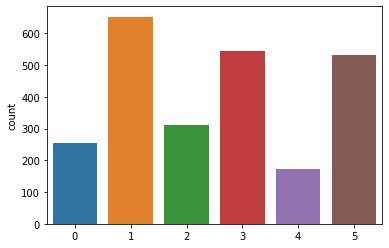

In [53]:
sns.countplot(model.labels_)
plt.show()

- For low invoice amount, the performance is poor (high dayslate and high daystosettle). It needs to be evaluated and improved. Recommendation: analyze further the method of payment, reminder system.